Infer locations of 9 US cities from distance data by solving the following optimization problem that finds the embedding of these 9 cities on a 2-dimensional map:

$\text{minimize}_{x_1,...,x_9} \sum_{i,j}(\|x_i - x_j\|-D_{ij})^2$   

where $\sum_{i,j}(\|x_i - x_j\|-D_{ij})^2$ denotes the embedding discrepany function

In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [92]:
cities = ['BOS', 'NYC', 'DC', 'MIA', 'CHI', 'SEA', 'SF', 'LA', 'DEN']
D = np.array([[0, 206, 429, 1504, 963, 2976, 3095, 2979, 1949], 
             [206, 0, 233, 1308, 802, 2815, 2934, 2786, 1771], 
             [429, 233, 0, 1075, 671, 2684, 2799, 2631, 1616], 
             [1504, 1308, 1075, 0, 1329, 3273, 3053, 2687, 2037], 
             [963, 802, 671, 1329, 0, 2013, 2142, 2054, 996], 
             [2976, 2815, 2684, 3273, 2013, 0, 808, 1131, 1307],
             [3095, 2934, 2799, 3053, 2142, 808, 0, 379, 1235], 
             [2979, 2786, 2631, 2687, 2054, 1131, 379, 0, 1059], 
             [1949, 1771, 1616, 2037, 996, 1307, 1235, 1059, 0]])

In [93]:
np.random.seed(123)

#2-dimensions because we're looking at pairs of locations
x_vals = np.random.multivariate_normal(np.zeros(2), np.identity(2), 9)

In [95]:
def discrepancy(x_vals, D):
    distanceSqError = 0
    for i in range(D.shape[0]):
        for j in range(D.shape[0]):
            distanceVector = x_vals[i] - x_vals[j]
            distance = np.sqrt(np.sum(np.square(distanceVector)))
            realDistance = D[i,j]
            distanceError = realDistance - distance
            distanceSqError += distanceError**2
    return distanceSqError

In [96]:
def discrepancy_gradient(j, x_vals, D):
    current_xj = x_vals[j, :]
    dist_xi_xj = np.sqrt(np.sum(np.square(current_xj - x_vals), axis = -1))
    weights = 4 * (dist_xi_xj - D[j, :]) / dist_xi_xj
    gradientSum = np.zeros_like(current_xj)
    for i in range(D.shape[0]):
        gradientSum += np.nan_to_num(weights[i] * (current_xj - x_vals[i]))
    return gradientSum

In [97]:
def update_xj(j, x_vals, D):
    prev_xj = x_vals[j, :].copy()
    prev_discrepancy = discrepancy(x_vals, D)
    rate = 10
    discr = discrepancy_gradient(j, x_vals, D)
    for i in range(10):
        x_vals[j, :] -= rate * discr
        cur_discrepancy = discrepancy(x_vals, D)
        if cur_discrepancy < prev_discrepancy: 
            return
        else: 
            x_vals[j, :] = prev_xj
            rate *= 0.1     

/Users/melindasong/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide


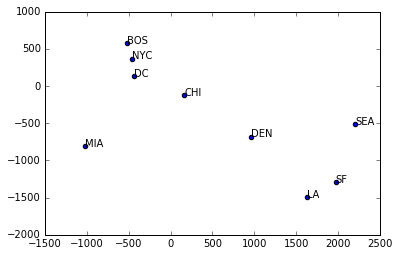

In [98]:
num_steps = 100

for i in range(num_steps):
    for j in range(9):
        update_xj(j, x_vals, D)

plt.scatter(x_vals[:, 0], x_vals[:, 1])
for i in range(len(cities)):
    plt.text(x_vals[i, 0], x_vals[i, 1], cities[i])
plt.show()

Output is approximately correct with axis flipped